# Sentiment Analysis and ML Model Building

## Import Necessary Libraries

In [45]:
import pandas as pd
from pre_process import preprocess, analyze_sentiment
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

## Read the File

In [46]:
ola = pd.read_csv('Data/Ola Customer Reviews.csv',usecols = ['review_description','rating'], dtype = {'rating':'category'},encoding = 'utf-8')

## Preprocess

In [47]:
ola.dropna(inplace = True) # Drop the Null Values

In [48]:
ola['review_description'] = ola['review_description'].apply(preprocess) # Clean the text

In [59]:
ola['sentiment'] = ola['review_description'].apply(analyze_sentiment,competitors = 'uber') # Assigning sentiments

In [79]:
tfidf = TfidfVectorizer(max_features = 5000) # For model Building

x_text = tfidf.fit_transform(ola['review_description'])
y = ola['sentiment']

In [80]:
scale = StandardScaler() # Scaling the Rating
x_rating = scale.fit_transform(ola[['rating']])

In [81]:
x = hstack([x_text,x_rating]) # To combine Vectorized data and Scaled Data

## Model Building

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

### **Logistic Regression**

In [83]:
model = LogisticRegression(solver = 'saga', max_iter = 1000)

In [84]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [85]:
pred = model.predict(x_test)

In [86]:
accuracy = accuracy_score(y_test,pred)

print(f"The accuracy of Logistic Regression: {round(accuracy,2)}")

The accuracy of Logistic Regression: 0.94


In [87]:
report = classification_report(y_test,pred)
print(f"The classification report of Logistic Regression:\n {report}")

The classification report of Logistic Regression:
               precision    recall  f1-score   support

    negative       0.92      0.93      0.92     23003
     neutral       0.94      0.94      0.94     14393
    positive       0.95      0.94      0.95     34140

    accuracy                           0.94     71536
   macro avg       0.94      0.94      0.94     71536
weighted avg       0.94      0.94      0.94     71536



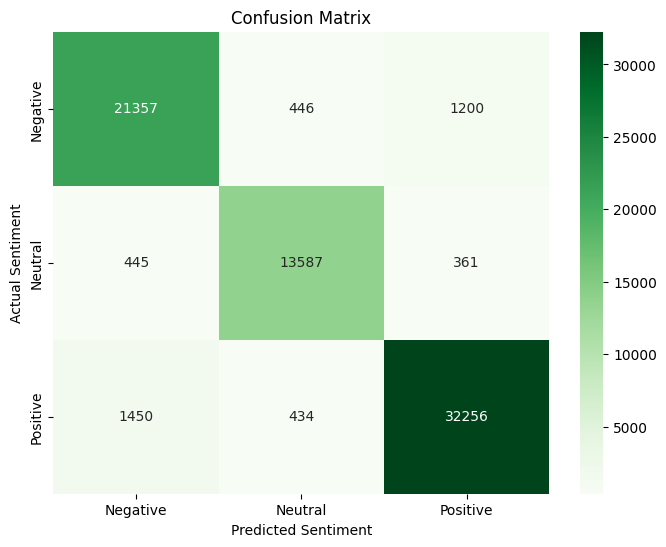

In [90]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Greens', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.show()

### *Observation*:

- The Accuracy of the Logistic Model is `94%`.

**Precision:** It is the proportion of positive predictions that were actually correct.

- For Negative reviews, the model correctly predicted 92% of the times when it said a review was negative.
- For Neutral reviews, it predicted 94% of the times correctly.
- For Positive reviews, the model was very accurate with 95%.

**Recall:** It is the proportion of actual positives that were correctly identified by the model.

- For Negative reviews, recall is 93%, meaning 93% of actual negative reviews were correctly identified.
- For Neutral reviews, recall is 94%.
- For Positive reviews, recall is 94%.

**F1-Score:** It is a Balanced metric that takes both `Precision` and `Recall` into account
- For Negative reviews, the F1-Score is 0.92, showing a strong balance of precision and recall.
- For Neutral reviews.
- For Positive reviews, the F1-Score is 0.95, indicating that the model performs well on this class.

**Macro Average:** Macro Average is the average of precision, recall, and F1-Score across all classes, calculated without considering class imbalance.

- This suggests that the model's macro averages are `0.94` for precision, recall, and F1-score.

**Weighted Average:** Weighted Average calculates the average of precision, recall, and F1-score, but with consideration of the number of instances (support) for each class.

- The weighted averages are also `0.94` for precision, recall, and F1-score, indicating that the model performs consistently well across all classes, considering their class distributions.



In [89]:
joblib.dump(model,'Model/logistic_model.pkl')
joblib.dump(tfidf,'Model/tfidf.pkl')
joblib.dump(scale,'Model/scale.pkl')

['Model/scale.pkl']

***Save the `Logistic_model`, `tfidfTokenizer` and `scaler`***